# III. Model Selection
## Assignment 2
### Model Selection on Climate Change on Crop

### **Step 1: Get to know Problem**
We create frame different types of machine learning tasks:
- **Classification**: Classifying the type of **Extreme Weather Event** or **Soil Health** levels based on weather conditions.
- **Clustering**: Grouping similar data points based on conditions like **Temperature**, **CO2 Levels**, and **Precipitation**.
- How the Crop Disease Incidence	Water Availability	Food Security	Economic Impact will be affected by Extreme Weather Events

In [90]:
import pandas as pd

# Load the dataset
df = pd.read_csv('processed_climate_change_data.csv')

# Display a few rows of the dataset
df.head()

# Get a summary of the dataset to understand the structure
df.info()

# Get basic statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Temperature             1000 non-null   int64 
 1   Precipitation           1000 non-null   int64 
 2   CO2 Levels              1000 non-null   int64 
 3   Crop Yield              1000 non-null   int64 
 4   Soil Health             1000 non-null   int64 
 5   Extreme Weather Events  1000 non-null   object
 6   Crop Disease Incidence  1000 non-null   object
 7   Water Availability      1000 non-null   object
 8   Food Security           1000 non-null   object
 9   Economic Impact         1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,25.129000,47.90500,401.983000,545.497000,5.51700
std,14.920489,29.81904,57.153664,260.779723,2.84672
min,0.000000,0.00000,300.000000,100.000000,1.00000
25%,12.000000,21.00000,355.000000,320.000000,3.00000
50%,25.000000,48.00000,404.000000,546.000000,6.00000
75%,39.000000,72.00000,452.000000,768.250000,8.00000
max,50.000000,100.00000,500.000000,1000.000000,10.00000


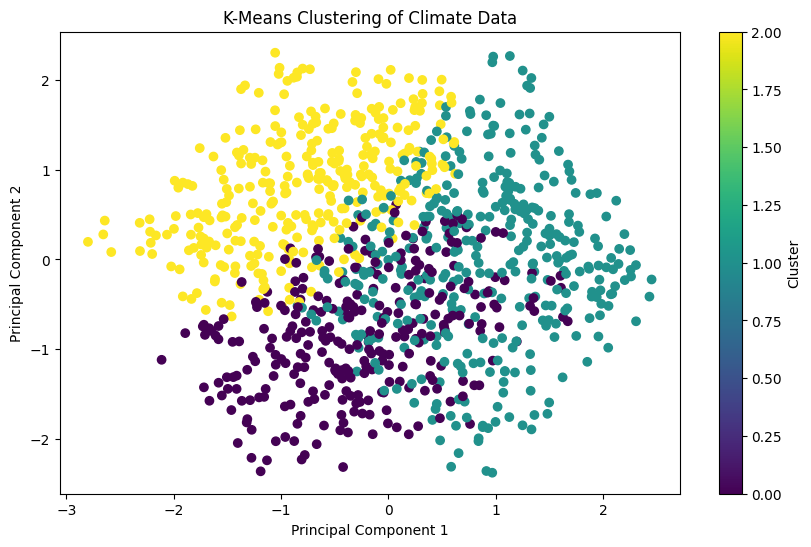

   Temperature  Precipitation  CO2 Levels  Crop Yield  Soil Health  \
0            7             59         329         483           10   
1           39             20         426         679            8   
2           18             46         403         587            5   
3            9             91         356         220            5   
4           35             12         325         538            1   

  Extreme Weather Events Crop Disease Incidence Water Availability  \
0                Drought                    Low               High   
1               Heatwave                   High                Low   
2                  Flood                    Low             Medium   
3               Heatwave                 Medium             Medium   
4                  Storm                 Medium             Medium   

  Food Security Economic Impact  Cluster  
0           Low            High        0  
1          High             Low        1  
2           Low          Medi

In [102]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load the dataset
df = pd.read_csv('processed_climate_change_data.csv')

# Step 2: Select features for clustering
features = ['Temperature', 'CO2 Levels', 'Precipitation']
X = df[features]

# Step 3: Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 5: Add the cluster labels to the original DataFrame
df['Cluster'] = labels

# Step 6: Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Climate Data')
plt.colorbar(label='Cluster')
plt.show()

# Display the first few rows of the DataFrame with cluster labels
print(df.head())

Inertia: 1780.7054840636947
Silhouette Score: 0.24377925213258442


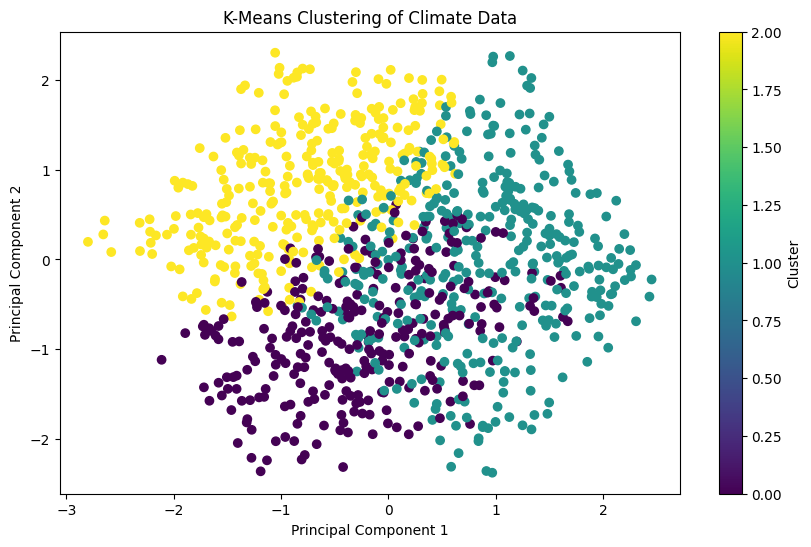

   Temperature  Precipitation  CO2 Levels  Crop Yield  Soil Health  \
0            7             59         329         483           10   
1           39             20         426         679            8   
2           18             46         403         587            5   
3            9             91         356         220            5   
4           35             12         325         538            1   

  Extreme Weather Events Crop Disease Incidence Water Availability  \
0                Drought                    Low               High   
1               Heatwave                   High                Low   
2                  Flood                    Low             Medium   
3               Heatwave                 Medium             Medium   
4                  Storm                 Medium             Medium   

  Food Security Economic Impact  Cluster  
0           Low            High        0  
1          High             Low        1  
2           Low          Medi

In [103]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
df = pd.read_csv('processed_climate_change_data.csv')

# Step 2: Select features for clustering
features = ['Temperature', 'CO2 Levels', 'Precipitation']
X = df[features]

# Step 3: Normalize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Step 5: Add the cluster labels to the original DataFrame
df['Cluster'] = labels

# Step 6: Calculate Clustering Scores
inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X_scaled, labels)

print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

# Step 7: Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Climate Data')
plt.colorbar(label='Cluster')
plt.show()

# Display the first few rows of the DataFrame with cluster labels
print(df.head())